In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
train = pd.read_csv('/drive/My Drive/Colab Notebooks/PR_lab_Assignments/Assignment1/train.txt',sep=' ', header = None)
test = pd.read_csv('/drive/My Drive/Colab Notebooks/PR_lab_Assignments/Assignment1/test.txt',sep=' ', header = None)


In [ ]:
class1 = []
class2 = []
test_class1 = []
test_class2 = []


For plotting training samples

In [ ]:
for i in range(len(train)):
  if(train[2][i] == 1):
    class1.append([train[0][i],train[1][i]])
  else:
    class2.append([train[0][i],train[1][i]])


In [ ]:
print(class1)
class2

[[2, 2], [3, 1], [3, 3], [-1, -3], [4, 2], [-2, -2]]


[[-4, 3], [2, 6], [0, 0], [-2, 2], [-1, -1], [-4, 2]]

Mean calculation

In [ ]:
x = 0
y = 0
for i in range(len(class1)):
  x +=class1[i][0]
  y +=class1[i][1]
mean1 = [x/len(class1),y/len(class1)]
print(mean1) 

[1.5, 0.5]


In [ ]:
x = 0
y = 0
for i in range(len(class1)):
  x +=class2[i][0]
  y +=class2[i][1]
mean2 = [x/len(class1),y/len(class1)]
print(mean2) 

[-1.5, 2.0]


In [ ]:
mean = [mean1,mean2]
mean

[[1.5, 0.5], [-1.5, 2.0]]

In [ ]:
mean1_x = mean1[0]
mean1_y = mean1[1]
mean2_x = mean2[0]
mean2_y = mean2[1]

For plotting Test samples

In [ ]:
for i in range(len(test)):
  g1 = (np.dot(np.transpose(mean1),np.array([test[0][i],test[1][i]]))) - (0.5 * (np.dot(np.transpose(mean1),mean1)))
  g2 = (np.dot(np.transpose(mean2),np.array([test[0][i],test[1][i]]))) - (0.5 * (np.dot(np.transpose(mean2),mean2)))
  print(g1,g2)
  if (g1 > g2):
   test_class1.append([test[0][i],test[1][i]])
  else:
   test_class2.append([test[0][i],test[1][i]])


-5.25 -11.625
4.25 -3.625
-3.75 1.875
11.75 -11.125
7.25 -14.125
-0.25 0.875
-5.75 1.375


In [ ]:
print(test_class1)
print(test_class2)

[[-1, -5], [3, 2], [8, 2], [6, -1]]
[[-2, 1], [0, 2], [-3, 0]]


In [ ]:
class1_x = []
class1_y = []
for i in range(len(class1)):
  class1_x.append(class1[i][0])
  class1_y.append(class1[i][1])
class1_x

[2, 3, 3, -1, 4, -2]

In [ ]:
class2_x = []
class2_y = []
for i in range(len(class2)):
  class2_x.append(class2[i][0])
  class2_y.append(class2[i][1])
class2_x

[-4, 2, 0, -2, -1, -4]

In [ ]:
test_class1_x = []
test_class1_y = []
for i in range(len(test_class1)):
  test_class1_x.append(test_class1[i][0])
  test_class1_y.append(test_class1[i][1])
test_class1_x

[-1, 3, 8, 6]

In [ ]:
test_class2_x = []
test_class2_y = []
for i in range(len(test_class2)):
  test_class2_x.append(test_class2[i][0])
  test_class2_y.append(test_class2[i][1])
test_class2_x

[-2, 0, -3]

For decision Boundary

In [ ]:
train_x1min = min(train[0])
train_x2min = min(train[1])
train_x1max = max(train[0])
train_x2max = max(train[1])
test_x1min = min(test[0])
test_x2min = min(test[1])
test_x1max = max(test[0])
test_x2max = max(test[1])
min_x = [train_x1min,train_x2min,test_x1min,test_x2min]
max_x = [train_x1max,train_x2max,test_x1max,test_x2max]
xmin = min(min_x)
xmax = max(max_x)
print("xmin:" , xmin)
print("xmax:" , xmax)     
constant = -0.5 * ((np.dot(np.transpose(mean1),mean1)) - (np.dot(np.transpose(mean2),mean2)))
print("constant: ", constant)

coeff = np.subtract(np.transpose(mean1),np.transpose(mean2))
print("coefficient:" ,coeff)



xmin: -5
xmax: 8
constant:  1.875
coefficient: [ 3.  -1.5]


In [ ]:
x = []
y = []
for i in range (xmin,xmax):
  x.append(i)
  y.append(-(np.dot(coeff[0],i) + constant)/coeff[1])

print("x: ", x)
print("y: ", y)

x:  [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7]
y:  [-8.75, -6.75, -4.75, -2.75, -0.75, 1.25, 3.25, 5.25, 7.25, 9.25, 11.25, 13.25, 15.25]


Plotting all points

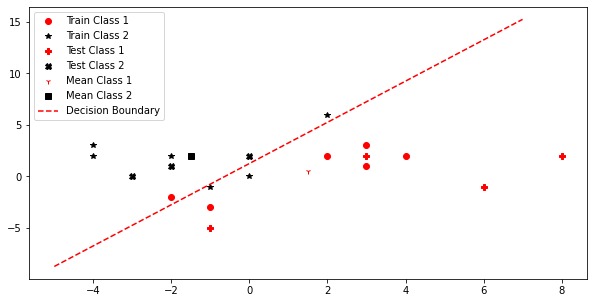

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(class1_x,class1_y,'or' , label = 'Train Class 1')
plt.plot(class2_x,class2_y,'*k' , label = 'Train Class 2')

plt.plot(test_class1_x,test_class1_y,'Pr' , label = 'Test Class 1')
plt.plot(test_class2_x,test_class2_y,'Xk' , label = 'Test Class 2')

plt.plot(mean1_x,mean1_y,'1r' , label = 'Mean Class 1')
plt.plot(mean2_x,mean2_y,'sk' , label = 'Mean Class 2')

plt.plot(x,y,'--r' , label = 'Decision Boundary')

plt.legend()
plt.show()

Accuracy 

In [ ]:
cnt = 0
for i in range(len(test)):
  if (test[2][i] == 1):
     for j in range(len(test_class1)):
       if ((test[0][i] == test_class1[j][0]) and (test[1][i] == test_class1[j][1])):
        cnt = cnt + 1
        break
  elif (test[2][i] == 2): 
    for j in range(len(test_class2)):
       if ((test[0][i] == test_class2[j][0]) and (test[1][i] == test_class2[j][1])):
         cnt = cnt + 1  
         break

#print(cnt)
print("Accuracy:",cnt*100/len(test))



Accuracy: 85.71428571428571
